In [6]:
%cd ..

/data/home/jkataok1/DA_DFD


In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from glob import glob
import os
import scipy.io
from sklearn.linear_model import LogisticRegression
from scipy.signal import spectrogram
import torch.nn as nn
import torch
from collections import OrderedDict
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sys
from src.ast_models import ASTModel
import torch
import torch.nn as nn
import torch.nn.functional as F

/data/home/jkataok1/mlenv/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [8]:
ims_data = np.load("/data/home/jkataok1/DA_DFD/data/processed/IMS/0_spectrogram.npz")
#ims_data = np.load("/data/home/jkataok1/DA_DFD/data/processed/IMS/0.npz")
ims_X = ims_data["x"]
ims_y = ims_data["y"]
ims_X.shape, ims_y.shape

((30000, 65, 18), (30000, 1))

In [9]:
ims_X[0]

array([[ 0.10463151, -0.1138447 , -0.00451252, ..., -0.33218739,
        -0.17047549, -0.05446472],
       [-0.16655587, -0.0899151 , -0.1630205 , ..., -0.1958911 ,
        -0.11776689, -0.17948583],
       [-0.35163212, -0.32360713, -0.36007875, ..., -0.36550621,
        -0.31688489,  0.01807609],
       ...,
       [-0.35419495, -0.3975192 , -0.06690245, ..., -0.26852455,
        -0.27944563, -0.43450527],
       [-0.33517712, -0.34769439, -0.31838216, ..., -0.12940009,
        -0.17796899, -0.27742573],
       [-0.36384129, -0.14403735, -0.37719052, ..., -0.32817484,
        -0.33361771, -0.29995711]])

In [6]:
cwru_data = np.load("/data/home/jkataok1/DA_DFD/data/processed/CWRU/all_spectrogram.npz")
cwru_X = cwru_data["x"]
cwru_y = cwru_data["y"]
cwru_X.shape, cwru_y.shape

((7017, 65, 18), (7017, 1))

In [101]:
model = ASTModel(label_dim=4, input_tdim=65, input_fdim=18, imagenet_pretrain=False, audioset_pretrain=False)
checkpoint = "/data/home/jkataok1/DA_DFD/src_models/CWRU_all_spectrogram_IMS_0_spectrogram_src_ast.pth"

state_dict_temp = torch.load(checkpoint)
model_params = model.state_dict()
for name, param in state_dict_temp.items():
    if name in model_params:
        model_params[name].copy_(param)
        print("copy {}".format(name))
    else:
        print("skip {}".format(name))
model.load_state_dict(state_dict_temp2, strict=True)
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x
#model.mlp_head=Identity()
model = model.to("cuda")

---------------AST Model Summary---------------
ImageNet pretraining: False, AudioSet pretraining: False
frequncey stride=10, time stride=10
number of patches=5


RuntimeError: Error(s) in loading state_dict for ASTModel:
	Missing key(s) in state_dict: "v.cls_token", "v.pos_embed", "v.dist_token", "v.patch_embed.proj.weight", "v.patch_embed.proj.bias", "v.blocks.0.norm1.weight", "v.blocks.0.norm1.bias", "v.blocks.0.attn.qkv.weight", "v.blocks.0.attn.qkv.bias", "v.blocks.0.attn.proj.weight", "v.blocks.0.attn.proj.bias", "v.blocks.0.norm2.weight", "v.blocks.0.norm2.bias", "v.blocks.0.mlp.fc1.weight", "v.blocks.0.mlp.fc1.bias", "v.blocks.0.mlp.fc2.weight", "v.blocks.0.mlp.fc2.bias", "v.blocks.1.norm1.weight", "v.blocks.1.norm1.bias", "v.blocks.1.attn.qkv.weight", "v.blocks.1.attn.qkv.bias", "v.blocks.1.attn.proj.weight", "v.blocks.1.attn.proj.bias", "v.blocks.1.norm2.weight", "v.blocks.1.norm2.bias", "v.blocks.1.mlp.fc1.weight", "v.blocks.1.mlp.fc1.bias", "v.blocks.1.mlp.fc2.weight", "v.blocks.1.mlp.fc2.bias", "v.blocks.2.norm1.weight", "v.blocks.2.norm1.bias", "v.blocks.2.attn.qkv.weight", "v.blocks.2.attn.qkv.bias", "v.blocks.2.attn.proj.weight", "v.blocks.2.attn.proj.bias", "v.blocks.2.norm2.weight", "v.blocks.2.norm2.bias", "v.blocks.2.mlp.fc1.weight", "v.blocks.2.mlp.fc1.bias", "v.blocks.2.mlp.fc2.weight", "v.blocks.2.mlp.fc2.bias", "v.blocks.3.norm1.weight", "v.blocks.3.norm1.bias", "v.blocks.3.attn.qkv.weight", "v.blocks.3.attn.qkv.bias", "v.blocks.3.attn.proj.weight", "v.blocks.3.attn.proj.bias", "v.blocks.3.norm2.weight", "v.blocks.3.norm2.bias", "v.blocks.3.mlp.fc1.weight", "v.blocks.3.mlp.fc1.bias", "v.blocks.3.mlp.fc2.weight", "v.blocks.3.mlp.fc2.bias", "v.blocks.4.norm1.weight", "v.blocks.4.norm1.bias", "v.blocks.4.attn.qkv.weight", "v.blocks.4.attn.qkv.bias", "v.blocks.4.attn.proj.weight", "v.blocks.4.attn.proj.bias", "v.blocks.4.norm2.weight", "v.blocks.4.norm2.bias", "v.blocks.4.mlp.fc1.weight", "v.blocks.4.mlp.fc1.bias", "v.blocks.4.mlp.fc2.weight", "v.blocks.4.mlp.fc2.bias", "v.blocks.5.norm1.weight", "v.blocks.5.norm1.bias", "v.blocks.5.attn.qkv.weight", "v.blocks.5.attn.qkv.bias", "v.blocks.5.attn.proj.weight", "v.blocks.5.attn.proj.bias", "v.blocks.5.norm2.weight", "v.blocks.5.norm2.bias", "v.blocks.5.mlp.fc1.weight", "v.blocks.5.mlp.fc1.bias", "v.blocks.5.mlp.fc2.weight", "v.blocks.5.mlp.fc2.bias", "v.blocks.6.norm1.weight", "v.blocks.6.norm1.bias", "v.blocks.6.attn.qkv.weight", "v.blocks.6.attn.qkv.bias", "v.blocks.6.attn.proj.weight", "v.blocks.6.attn.proj.bias", "v.blocks.6.norm2.weight", "v.blocks.6.norm2.bias", "v.blocks.6.mlp.fc1.weight", "v.blocks.6.mlp.fc1.bias", "v.blocks.6.mlp.fc2.weight", "v.blocks.6.mlp.fc2.bias", "v.blocks.7.norm1.weight", "v.blocks.7.norm1.bias", "v.blocks.7.attn.qkv.weight", "v.blocks.7.attn.qkv.bias", "v.blocks.7.attn.proj.weight", "v.blocks.7.attn.proj.bias", "v.blocks.7.norm2.weight", "v.blocks.7.norm2.bias", "v.blocks.7.mlp.fc1.weight", "v.blocks.7.mlp.fc1.bias", "v.blocks.7.mlp.fc2.weight", "v.blocks.7.mlp.fc2.bias", "v.blocks.8.norm1.weight", "v.blocks.8.norm1.bias", "v.blocks.8.attn.qkv.weight", "v.blocks.8.attn.qkv.bias", "v.blocks.8.attn.proj.weight", "v.blocks.8.attn.proj.bias", "v.blocks.8.norm2.weight", "v.blocks.8.norm2.bias", "v.blocks.8.mlp.fc1.weight", "v.blocks.8.mlp.fc1.bias", "v.blocks.8.mlp.fc2.weight", "v.blocks.8.mlp.fc2.bias", "v.blocks.9.norm1.weight", "v.blocks.9.norm1.bias", "v.blocks.9.attn.qkv.weight", "v.blocks.9.attn.qkv.bias", "v.blocks.9.attn.proj.weight", "v.blocks.9.attn.proj.bias", "v.blocks.9.norm2.weight", "v.blocks.9.norm2.bias", "v.blocks.9.mlp.fc1.weight", "v.blocks.9.mlp.fc1.bias", "v.blocks.9.mlp.fc2.weight", "v.blocks.9.mlp.fc2.bias", "v.blocks.10.norm1.weight", "v.blocks.10.norm1.bias", "v.blocks.10.attn.qkv.weight", "v.blocks.10.attn.qkv.bias", "v.blocks.10.attn.proj.weight", "v.blocks.10.attn.proj.bias", "v.blocks.10.norm2.weight", "v.blocks.10.norm2.bias", "v.blocks.10.mlp.fc1.weight", "v.blocks.10.mlp.fc1.bias", "v.blocks.10.mlp.fc2.weight", "v.blocks.10.mlp.fc2.bias", "v.blocks.11.norm1.weight", "v.blocks.11.norm1.bias", "v.blocks.11.attn.qkv.weight", "v.blocks.11.attn.qkv.bias", "v.blocks.11.attn.proj.weight", "v.blocks.11.attn.proj.bias", "v.blocks.11.norm2.weight", "v.blocks.11.norm2.bias", "v.blocks.11.mlp.fc1.weight", "v.blocks.11.mlp.fc1.bias", "v.blocks.11.mlp.fc2.weight", "v.blocks.11.mlp.fc2.bias", "v.norm.weight", "v.norm.bias", "v.head.weight", "v.head.bias", "v.head_dist.weight", "v.head_dist.bias", "mlp_head.0.weight", "mlp_head.0.bias", "mlp_head.1.weight", "mlp_head.1.bias". 

In [ ]:
sta

In [71]:
# Rewrite this part with batch learning
batch_size = 1000  # Set the batch size that fits into your GPU
# Convert your data to tensor
ims_tensor = torch.cuda.FloatTensor(ims_X)
res_ims = []
with torch.no_grad():
    for i in range(0, len(ims_X), batch_size):
        # Get mini-batch
        batch = ims_tensor[i:i + batch_size]
        # Model inference
        out = model(batch)
        # Collect results
        res_ims.append(out)

        print(f"Progress: {i}/{len(ims_X)}", end="\r")
# Concatenate all the results
res_ims = torch.cat(res_ims, dim=0)

In [72]:
cwru_tensor = torch.cuda.FloatTensor(cwru_X)
res_cwru = []
with torch.no_grad():
    for i in range(0, len(cwru_X), batch_size):
        # Get mini-batch
        batch = cwru_tensor[i:i + batch_size]
        # Model inference
        out = model(batch)
        # Collect results
        res_cwru.append(out)
        print(f"Progress: {i}/{len(cwru_X)}", end="\r")

res_cwru = torch.cat(res_cwru, dim=0)

In [99]:
p_ims = F.softmax(res_ims, dim=1)
pred_ims = p_ims.argmax(dim=1).reshape(-1).cpu().numpy()
np.sum(pred_ims == ims_y.reshape(-1)) / len(ims_y)
#acc_cwru = sum(correct) / len(correct)
#print(f"Accuracy on CWRU dataset: {acc_cwru:.2f}")


0.20686666666666667

In [10]:
features_all = torch.cat([res_cwru, res_ims], axis=0)
label_all = np.concatenate([cwru_y, ims_y], axis=0)

In [11]:
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(features_all.cpu().numpy())

/data/home/jkataok1/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/data/home/jkataok1/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
tsne = TSNE(n_components=2)
cwru_tsne_features = tsne.fit_transform(res_cwru.cpu().numpy())

/data/home/jkataok1/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/data/home/jkataok1/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [22]:
def get_colmap(y, color_list):
    colmap = []
    for i in y:
        colmap.append(color_list[int(i)])
    return colmap

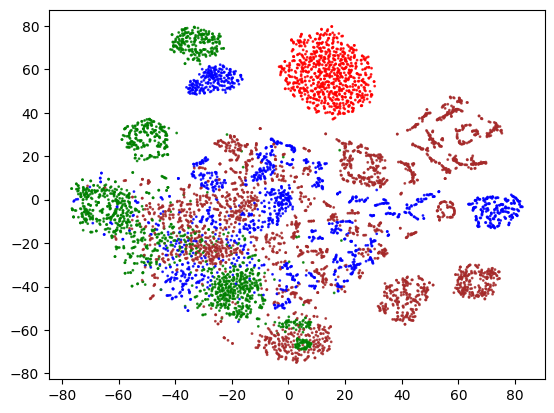

In [26]:
plt.scatter(cwru_tsne_features[:, 0], cwru_tsne_features[:, 1], c=get_colmap(cwru_y, ["red", "green", "blue", "brown"]), alpha=0.8, label='cwru', s=1)

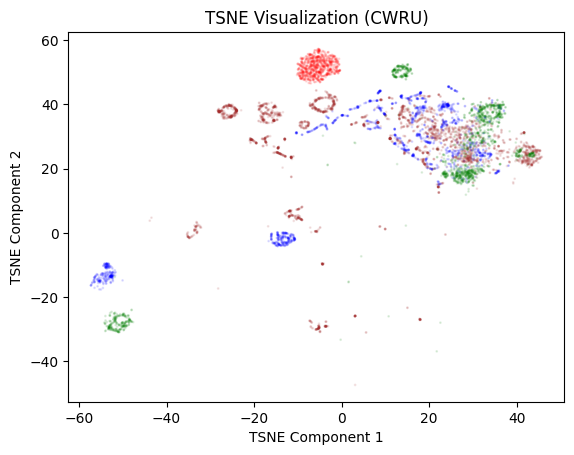

In [19]:
def get_colmap(y, color_list):
    colmap = []
    for i in y:
        colmap.append(color_list[int(i)])
    return colmap
plt.scatter(tsne_features[:len(cwru_y), 0], tsne_features[:len(cwru_y), 1], c=get_colmap(cwru_y, ["red", "green", "blue", "brown"]), alpha=0.1, label='ims', s=1)
#plt.scatter(tsne_features[len(cwru_y):, 0], tsne_features[len(cwru_y):, 1], c=get_colmap(ims_y, ["red", "green", 'blue', "brown"]), alpha=1.0, label='cwru', s=2)
# remove color bar
plt.title('TSNE Visualization (CWRU)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()